<center><b><font size="5">GUT unification of BPR neutrino mass model</font></b></center>

# Initialization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import math, itertools
#from scipy import pi
from sympy import Rational, sqrt, Symbol, S, init_printing, latex

In [2]:
from constants import *
from group_theory import *
from rge import *
from GUTtesting import *

In [3]:
np.set_printoptions(precision=2)
init_printing(use_latex='mathjax')

# Checks of $\beta$-function coefficients

## SM RGE coeffs (1L and 2L)

In [4]:
# 1L SM RGE coeffs
[rge1L(k).subs({ng:3, nh:1}) for k in [1,2,3]]

⎡41           ⎤
⎢──, -19/6, -7⎥
⎣10           ⎦

In [5]:
# 2L SM RGE coeffs
[[rge2L(p, k).subs({ng: 3, nh:1}) for k in [1,2,3]] for p in [1,2,3]]

⎡⎡199  27      ⎤                    ⎡11          ⎤⎤
⎢⎢───, ──, 44/5⎥, [9/10, 35/6, 12], ⎢──, 9/2, -26⎥⎥
⎣⎣ 50  10      ⎦                    ⎣10          ⎦⎦

The above agrees with e.g. Eq. (2.4) from [Hagedorn et al.](http://www.arXiv.org/abs/1605.03986)
![Hagedorn (2.4)](img/hagedorn24.png)

Note that this reference has $y=Y/2$.

In [6]:
y = Symbol('y')
irrep(1,1,2*y).D, irrep(1,1,2*y).C2(1), irrep(1,1,2*y).S2(1)

⎛      2     2⎞
⎜   3⋅y   3⋅y ⎟
⎜1, ────, ────⎟
⎝    5     5  ⎠

In [7]:
d = Symbol('d')
irrep(1,d,2*y).C2(2), irrep(1,d,2*y).S2(2)

⎛          ⎛ 2    ⎞⎞
⎜          ⎜d    1⎟⎟
⎜ 2      d⋅⎜── - ─⎟⎟
⎜d    1    ⎝4    4⎠⎟
⎜── - ─, ──────────⎟
⎝4    4      3     ⎠

which is also in agreement with Hagedorn et al App. A.

## BSM RGE coeffs (1L and 2L) for additional complex scalar

Again comparing with Hagedorn, Table8, (1,2,y) and (8,3,y) REPs:

In [8]:
[rge1L(k, BSMscalars=[ComplexScalar(1,2,2*y)]).subs({ng:3, nh:1})-rge1L(k).subs({ng:3, nh:1}) for k in [1,2,3]]

⎡   2        ⎤
⎢2⋅y         ⎥
⎢────, 1/6, 0⎥
⎣ 5          ⎦

In [9]:
[[rge2L(p, k, BSMscalars=[ComplexScalar(1,2,2*y)]).subs({ng: 3, nh:1})-rge2L(p, k).subs({ng: 3, nh:1}) for k in [1,2,3]] for p in [1,2,3]]

⎡⎡    4      2   ⎤  ⎡   2         ⎤           ⎤
⎢⎢72⋅y   18⋅y    ⎥  ⎢6⋅y          ⎥           ⎥
⎢⎢─────, ─────, 0⎥, ⎢────, 13/6, 0⎥, [0, 0, 0]⎥
⎣⎣  25     5     ⎦  ⎣ 5           ⎦           ⎦

This **agrees** with Hagedorn:
![Hagedorn App](img/hagedorn12y.png)
where one notes that my $b_{2,2}$ is obtained from two Hagedorn's rightmost matrices like this:

In [10]:
S(3)/2 + S(2)/3

13/6

In [11]:
[rge1L(k, BSMscalars=[ComplexScalar(8,3,2*y)]).subs({ng:3, nh:1})-SM1L[k-1] for k in [1,2,3]]

⎡    2         ⎤
⎢24⋅y          ⎥
⎢─────, 16/3, 3⎥
⎣  5           ⎦

In [12]:
[[rge2L(p, k, BSMscalars=[ComplexScalar(8,3,2*y)]).subs({ng: 3, nh:1})-rge2L(p, k).subs({ng: 3, nh:1}) for k in [1,2,3]] for p in [1,2,3]]

⎡⎡     4       2       2⎤  ⎡     2            ⎤  ⎡     2         ⎤⎤
⎢⎢864⋅y   576⋅y   864⋅y ⎥  ⎢192⋅y             ⎥  ⎢108⋅y          ⎥⎥
⎢⎢──────, ──────, ──────⎥, ⎢──────, 448/3, 192⎥, ⎢──────, 72, 126⎥⎥
⎣⎣  25      5       5   ⎦  ⎣  5               ⎦  ⎣  5            ⎦⎦

This is  again in **agreement** with Table 8 of Hagedorn et al.
![Hagedorn tbl 8](img/hagedorn83y.png)
where $b_{2,2}$ and $b_{3,3}$ are obtained like this:

In [13]:
128 + S(64)/3, 108 + 18

(448/3, 126)

## Filaviez Peres and Murgui Table1  (1L)

In [14]:
def Bij(BSMscalars=[], BSMfermions=[]):
    """One loop RGE coefficient differences Bij=bi-bj"""
    b1, b2, b3 = [rge1LBSM(k, BSMscalars=BSMscalars, BSMfermions=BSMfermions) for k in [1,2,3]]
    return b1-b2, b2-b3

In [15]:
def Bij(BSMscalars=[], BSMfermions=[]):
    """One loop RGE coefficient differences Bij=bi-bj"""
    b1, b2, b3 = [rge1BSM(k, BSMscalars+BSMfermions) for k in [1,2,3]]
    return b1-b2, b2-b3

SU(5) irreps branched to SU(3)xSU(2)xU(1) with convention $Q=T_3 + Y/2$ so that hypercharge numbers in Slansky Table 30 are multiplied by $1/3$. 

In [16]:
SU5_5H = [ComplexScalar(1,2,1), ComplexScalar(3,1,-Rational(2,3))]

In [17]:
[Bij(BSMscalars=[irrep]) for irrep in SU5_5H]

[(-1/15, 1/6), (1/15, -1/6)]

In [18]:
SU5_45H = [
    ComplexScalar(8,2,1),
    ComplexScalar(6,1,-Rational(2,3)),
    ComplexScalar(3,3,-Rational(2,3)),
    ComplexScalar(3,2,-Rational(7,3)),
    ComplexScalar(3,1, -Rational(2,3)),
    ComplexScalar(3,1,Rational(8,3)),
    ComplexScalar(1,2,1)
] 
[Bij(BSMscalars=[irrep]) for irrep in SU5_45H]

⎡                                          ⎛17     ⎞                ⎛16      ⎞
⎢(-8/15, -2/3), (2/15, -5/6), (-9/5, 3/2), ⎜──, 1/6⎟, (1/15, -1/6), ⎜──, -1/6⎟
⎣                                          ⎝15     ⎠                ⎝15      ⎠

              ⎤
, (-1/15, 1/6)⎥
              ⎦

In [19]:
SU5_10H = [ComplexScalar(1,1,2), ComplexScalar(3,2, Rational(1,3)), ComplexScalar(3,1,-Rational(4,3))] 
[Bij(BSMscalars=[irrep]) for irrep in SU5_10H]

[(1/5, 0), (-7/15, 1/6), (4/15, -1/6)]

Again, we have total agreement at 1L

## MSSM RGE coeffs (1L and 2L)

These are degrees of freedom beyond what is in (SM + second Higgs doublet)

In [20]:
# we count only left-handed particles
# note that nh = 2 in MSSM
MSSMscalars = [
    ComplexScalar(1, 2, -1, ng),  # left slepton doublet
    ComplexScalar(1, 1,  2, ng),  # anti-right slepton singlet
    ComplexScalar(3, 2, Rational(1,3), ng),  # left squark doublet
    ComplexScalar(3, 1, Rational(-4,3), ng), # anti-right sup squark singlet
    ComplexScalar(3, 1, Rational(2,3), ng) # anti-right sdown squark singlet 
    ]
MSSMfermions = [
    Weyl(1, 2, 1, nh),     # Higgsino doublets
    Weyl(8, 1, 0),         # gluinos
    Weyl(1, 3, 0),         # winos
    Weyl(1, 1, 0)          # bino
    ]

In [21]:
b1, b2, b3 = [rge1L(N, BSMfermions=MSSMfermions, BSMscalars=MSSMscalars).subs({ng: 3, nh:2}) for N in [1,2,3]]; (b1, b2, b3)

(33/5, 1, -3)

Taking into account $\sqrt{5/3}$ U(1) normalization this agrees with e.g.  Martin and Vaughn, [hep-ph/9311340](http://www.arxiv.org/abs/hep-ph/9311340), below Eq. (4.4), and also gives famous MSSM 1L unification result for $B_{23}/B_{12}$ in good agreement with experimental 0.718:

In [22]:
(b2-b3)/(b1-b2), float((b2-b3)/(b1-b2))

(5/7, 0.7142857142857143)

In [23]:
[[rge2L(p, k, BSMfermions=MSSMfermions, BSMscalars=MSSMscalars).subs({ng: 3, nh:2}) for k in [1,2,3]] for p in [1,2,3]]

⎡⎡597  81       ⎤  ⎡27           ⎤  ⎡33          ⎤⎤
⎢⎢───, ──, 132/5⎥, ⎢──, 127/2, 36⎥, ⎢──, 27/2, 66⎥⎥
⎣⎣ 50  10       ⎦  ⎣10           ⎦  ⎣10          ⎦⎦

This quite **disagrees** in all elements with Martin and Vaughn Eq. (4.5) !!
![Martin Vaugn](img/martinvaughn.png)

This is likely due to some forgotten 2L terms (Timon/Borut explained) which are, due to SUSY, also proportional to powers of gauge couplings - so I am not worrying about this any more.

## LaTeX tables  of $\beta$-function coefficients for the paper

This is the only section in this notebook where we print Y/2 for Y, conforming to definition of hypercharge used in the paper!

In [24]:
def pp(s):
    """pretty-printing of expressions by putting into LaTeX math mode"""
    #return s
    return '$'+str(s)+'$'

def fmt(x):
    """Creating formatting string for fractions."""
    if x < 0:
        return "& ${} r_k$"
    elif x > 0:
        return "& $\hphantom{{+}}{} r_k$"
    else:
        return "& ${}$"

In [25]:
BPR_reps = {
    'h^+' : ComplexScalar(1,1,2),
    '\Delta' : RealScalar(1,3,0),
    'E_{L,R}' : Weyl(1,2,-1) 
}

print(r"\begin{tabular}{c c| c c}")
print(r" \multicolumn{2}{c|}{$k$} &  $\Delta B_{23}$  & $\Delta B_{12}$   \\ \hline")
for f, rep in BPR_reps.items():
    b1, b2, b3 = [rge1BSM(k, [rep]) for k in [1,2,3]]
    Sk, Ck = Atest(rep)
    fmts = r"${}$ & $({},{},{})$ " + fmt(b2-b3) + fmt(b1-b2) + r" \\"
    print(fmts.format(f, rep.D3, rep.D2, S(rep.Y)/2, latex(b2-b3), latex(b1-b2)))
print(r"\end{tabular}")

\begin{tabular}{c c| c c}
 \multicolumn{2}{c|}{$k$} &  $\Delta B_{23}$  & $\Delta B_{12}$   \\ \hline
$h^+$ & $(1,1,1)$ & $0$& $\hphantom{+}\frac{1}{5} r_k$ \\
$\Delta$ & $(1,3,0)$ & $\hphantom{+}\frac{1}{3} r_k$& $- \frac{1}{3} r_k$ \\
$E_{L,R}$ & $(1,2,-1/2)$ & $\hphantom{+}\frac{1}{3} r_k$& $- \frac{2}{15} r_k$ \\
\end{tabular}


In [26]:
five_reps = {                                                                           
  '\irrepsub{5}{H}': {                                                                 
 'H' : ComplexScalar(1,2,1),                                                           
 'S_1' : ComplexScalar(3,1,-Rational(2,3)),                                             
    },                                                                                 
# 10                                                                                   
  '\irrepsub{10}{S}': {                                                                 
 'h \equiv \phi_3' : ComplexScalar(1,1,2),                                             
 '\phi_2' : ComplexScalar(3,1,-Rational(4,3)),                                        
 '\phi_1' : ComplexScalar(3,2,Rational(1,3))},                                        
# 24                                                                                   
  '\irrepsub{24}{S}': {                                                                 
    '\chi_1 ' : RealScalar(1,1,0),                                                     
    '\Delta \equiv \chi_2 ' : RealScalar(1,3,0),                                    
    '\chi_3 ' : RealScalar(8,1,0),                                                  
    '\chi_4 ' : RealScalar(3,2,-Rational(5,3)),                                         
    '\chi_5 ' : RealScalar(3,2,Rational(5,3))},                                         
# F                                                                                   
  '\irrepbarsub{5}{F}': {                                                             
 'E_{L,R} ' : Weyl(1,2,-1),                                                             
   '' : Weyl(3,1,Rational(2,3))}
}

In [27]:
fortyfive_reps = {     
# 45                                                                                   
  '\irrepsub{45}{H}': {                                                                 
    '\Sigma_1' : ComplexScalar(1,2,1),
    'S_1\equiv\Sigma_2' : ComplexScalar(3,1,-Rational(2,3)),
    'S_3\equiv\Sigma_3' : ComplexScalar(3,3,-Rational(2,3)),
    r'\tilde{S}_1\equiv\Sigma_4' : ComplexScalar(3,1,Rational(8,3)),
    '\Sigma_5' : ComplexScalar(3,2,-Rational(7,3)),
    '\Sigma_6' : ComplexScalar(6,1,-Rational(2,3)),
    '\Sigma_7' : ComplexScalar(8,2,1) }
}

In [28]:
seventy_reps = {     
# 70  
'\irrepsub{70}{H}': {  
    '\Omega_1' : ComplexScalar(1,2,1),
    'S_1 \equiv \Omega_2' : ComplexScalar(3,1,-Rational(2,3)),
    'S_3 \equiv \Omega_3' : ComplexScalar(3,3,-Rational(2,3)),
    '\Omega_4' : ComplexScalar(3,3,Rational(8,3)),
    '\Omega_5' : ComplexScalar(6,2,-Rational(7,3)),
    '\Omega_6' : ComplexScalar(15,1,-Rational(2,3)),
    '\Omega_7' : ComplexScalar(8,2,1),
    '\Omega_8' : ComplexScalar(1,4,1)
 }
}

In [29]:
print(r"\begin{tabular}{c c c| c c}")
print(r" \multicolumn{3}{c|}{$k$}  &  $\Delta B_{23}$  & $\Delta B_{12}$ \\")
for name, reps in five_reps.items():
    first = '\multirow{{ {} }}{{*}}{{ {} }}'.format(len(reps), name)
    print(r'\hline')
    for f, rep in reps.items():
        b1, b2, b3 = [rge1BSM(k, [rep]) for k in [1,2,3]]
        Sk, Ck = Atest(rep)
        fmts = r"${}$ & $({},{},{})$ & {}" + fmt(b2-b3) + fmt(b1-b2) + r" \\"
        print(fmts.format(f, rep.D3, rep.D2, S(rep.Y)/2, first, latex(b2-b3), latex(b1-b2)))
        if first:
            first = ''
print(r"\end{tabular}")

\begin{tabular}{c c c| c c}
 \multicolumn{3}{c|}{$k$}  &  $\Delta B_{23}$  & $\Delta B_{12}$ \\
\hline
$H$ & $(1,2,1/2)$ & \multirow{ 2 }{*}{ \irrepsub{5}{H} }& $\hphantom{+}\frac{1}{6} r_k$& $- \frac{1}{15} r_k$ \\
$S_1$ & $(3,1,-1/3)$ & & $- \frac{1}{6} r_k$& $\hphantom{+}\frac{1}{15} r_k$ \\
\hline
$h \equiv \phi_3$ & $(1,1,1)$ & \multirow{ 3 }{*}{ \irrepsub{10}{S} }& $0$& $\hphantom{+}\frac{1}{5} r_k$ \\
$\phi_2$ & $(3,1,-2/3)$ & & $- \frac{1}{6} r_k$& $\hphantom{+}\frac{4}{15} r_k$ \\
$\phi_1$ & $(3,2,1/6)$ & & $\hphantom{+}\frac{1}{6} r_k$& $- \frac{7}{15} r_k$ \\
\hline
$\chi_1 $ & $(1,1,0)$ & \multirow{ 5 }{*}{ \irrepsub{24}{S} }& $0$& $0$ \\
$\Delta \equiv \chi_2 $ & $(1,3,0)$ & & $\hphantom{+}\frac{1}{3} r_k$& $- \frac{1}{3} r_k$ \\
$\chi_3 $ & $(8,1,0)$ & & $- \frac{1}{2} r_k$& $0$ \\
$\chi_4 $ & $(3,2,-5/6)$ & & $\hphantom{+}\frac{1}{12} r_k$& $\hphantom{+}\frac{1}{6} r_k$ \\
$\chi_5 $ & $(3,2,5/6)$ & & $\hphantom{+}\frac{1}{12} r_k$& $\hphantom{+}\frac{1}{6} r_k$ \\
\hline

In [30]:
print(r"\begin{tabular}{c c c| c c}")
print(r" \multicolumn{3}{c|}{$k$}  &  $\Delta B_{23}$  & $\Delta B_{12}$ \\")
for name, reps in fortyfive_reps.items():
    first = '\multirow{{ {} }}{{*}}{{ {} }}'.format(len(reps), name)
    print(r'\hline')
    for f, rep in reps.items():
        b1, b2, b3 = [rge1BSM(k, [rep]) for k in [1,2,3]]
        Sk, Ck = Atest(rep)
        fmts = r"${}$ & $({},{},{})$ & {}" + fmt(b2-b3) + fmt(b1-b2) + r" \\"
        print(fmts.format(f, rep.D3, rep.D2, S(rep.Y)/2, first, latex(b2-b3), latex(b1-b2)))
        if first:
            first = ''
print(r"\end{tabular}")

\begin{tabular}{c c c| c c}
 \multicolumn{3}{c|}{$k$}  &  $\Delta B_{23}$  & $\Delta B_{12}$ \\
\hline
$\Sigma_1$ & $(1,2,1/2)$ & \multirow{ 7 }{*}{ \irrepsub{45}{H} }& $\hphantom{+}\frac{1}{6} r_k$& $- \frac{1}{15} r_k$ \\
$S_1\equiv\Sigma_2$ & $(3,1,-1/3)$ & & $- \frac{1}{6} r_k$& $\hphantom{+}\frac{1}{15} r_k$ \\
$S_3\equiv\Sigma_3$ & $(3,3,-1/3)$ & & $\hphantom{+}\frac{3}{2} r_k$& $- \frac{9}{5} r_k$ \\
$\tilde{S}_1\equiv\Sigma_4$ & $(3,1,4/3)$ & & $- \frac{1}{6} r_k$& $\hphantom{+}\frac{16}{15} r_k$ \\
$\Sigma_5$ & $(3,2,-7/6)$ & & $\hphantom{+}\frac{1}{6} r_k$& $\hphantom{+}\frac{17}{15} r_k$ \\
$\Sigma_6$ & $(6,1,-1/3)$ & & $- \frac{5}{6} r_k$& $\hphantom{+}\frac{2}{15} r_k$ \\
$\Sigma_7$ & $(8,2,1/2)$ & & $- \frac{2}{3} r_k$& $- \frac{8}{15} r_k$ \\
\end{tabular}


In [31]:
print(r"\begin{tabular}{c c c| c c}")
print(r" \multicolumn{3}{c|}{$k$}  &  $\Delta B_{23}$  & $\Delta B_{12}$ \\")
for name, reps in seventy_reps.items():
    first = '\multirow{{ {} }}{{*}}{{ {} }}'.format(len(reps), name)
    print(r'\hline')
    for f, rep in reps.items():
        b1, b2, b3 = [rge1BSM(k, [rep]) for k in [1,2,3]]
        Sk, Ck = Atest(rep)
        fmts = r"${}$ & $({},{},{})$ & {}" + fmt(b2-b3) + fmt(b1-b2) + r" \\"
        print(fmts.format(f, rep.D3, rep.D2, S(rep.Y)/2, first, latex(b2-b3), latex(b1-b2)))
        if first:
            first = ''
print(r"\end{tabular}")

\begin{tabular}{c c c| c c}
 \multicolumn{3}{c|}{$k$}  &  $\Delta B_{23}$  & $\Delta B_{12}$ \\
\hline
$\Omega_1$ & $(1,2,1/2)$ & \multirow{ 8 }{*}{ \irrepsub{70}{H} }& $\hphantom{+}\frac{1}{6} r_k$& $- \frac{1}{15} r_k$ \\
$S_1 \equiv \Omega_2$ & $(3,1,-1/3)$ & & $- \frac{1}{6} r_k$& $\hphantom{+}\frac{1}{15} r_k$ \\
$S_3 \equiv \Omega_3$ & $(3,3,-1/3)$ & & $\hphantom{+}\frac{3}{2} r_k$& $- \frac{9}{5} r_k$ \\
$\Omega_4$ & $(3,3,4/3)$ & & $\hphantom{+}\frac{3}{2} r_k$& $\hphantom{+}\frac{6}{5} r_k$ \\
$\Omega_5$ & $(6,2,-7/6)$ & & $- \frac{2}{3} r_k$& $\hphantom{+}\frac{34}{15} r_k$ \\
$\Omega_6$ & $(15,1,-1/3)$ & & $- \frac{10}{3} r_k$& $\hphantom{+}\frac{1}{3} r_k$ \\
$\Omega_7$ & $(8,2,1/2)$ & & $- \frac{2}{3} r_k$& $- \frac{8}{15} r_k$ \\
$\Omega_8$ & $(1,4,1/2)$ & & $\hphantom{+}\frac{5}{3} r_k$& $- \frac{22}{15} r_k$ \\
\end{tabular}


# Gauge coupling crossing test 

## Overview

Instead of standard B-test, we can use its variant which involves aditive quantity

$$ A \equiv B_{23}^{\rm BSM} - 0.718 B_{12}^{\rm BSM} = 1.384 $$

and it is convenient to test it together with testing that GUT scale is between, say, $5\times10^{15}$ GeV and $1\times10^{17}$ GeV, which can be translated into requirement

$$ -1.9 < B_{12}^{\rm BSM} < -1.4 $$

In [32]:
b1, b2, b3 = SM1L
(b1-b2)*0.718 - (b2-b3) # RHS of A-test

1.38413333333333

In [33]:
Bgut = 184.8
b1, b2, b3 = SM1L
Bgut/math.log(5e15/mZ)-(b1-b2), Bgut/math.log(1e16/mZ)-(b1-b2), Bgut/math.log(1e17/mZ)-(b1-b2)

(-1.42508929624047, -1.55033731663619, -1.93041083178657)

This is implemented in function <code>Atest</code> which returns $B_{12}$, as well as quantity $A$ above.

Now we check that complete SU(5) irreps don't contribute to running

In [34]:
for SU5rep in [SU5_5, SU5_10, SU5_15, SU5_24, SU5_35, SU5_40, SU5_45, SU5_50, SU5_70]:
    print(Atest([ComplexScalar(*v) for v in SU5rep.values()]))

[ 0.  0.]
[ 0.  0.]
[ 0.  0.]
[ 0.  0.]
[ 0.  0.]
[ 0.  0.]
[ 0.  0.]
[ 0.  0.]
[ 0.  0.]


Now the contributions of particular SM group irreps:

In [35]:
print('           irrep     delB_12    delA')#.format(F, dim))
print(45*'=')
for SU5rep in [SU5_5, SU5_10, SU5_15, SU5_24, SU5_35, SU5_40, SU5_45, SU5_50, SU5_70]:
    dim = 0
    for f, nrep in SU5rep.items():
        dim += nrep[0]*nrep[1]
    print('----------- [{:<2d}] ---------------------'.format(dim))
    for f, nrep in SU5rep.items():
        rep = ComplexScalar(*nrep)  # note that SU5_24 can be real
        print("{:>6} ({},{},{:^6}) : {: .3f}  {: .3f}".format(f, rep.D3, rep.D2, str(rep.Y), *Atest(rep)))

           irrep     delB_12    delA
----------- [5 ] ---------------------
    H5 (1,2,  1   ) : -0.067   0.215
    S1 (3,1, -2/3 ) :  0.067  -0.215
----------- [10] ---------------------
     h (1,1,  2   ) :  0.200  -0.144
    U1 (3,1, -4/3 ) :  0.267  -0.358
   R2t (3,2, 1/3  ) : -0.467   0.502
----------- [15] ---------------------
    i1 (1,3,  2   ) : -0.067   0.715
   R2t (3,2, 1/3  ) : -0.467   0.502
    i3 (6,1, -4/3 ) :  0.533  -1.216
----------- [24] ---------------------
    c1 (1,1,  0   ) :  0.000   0.000
   DEL (1,3,  0   ) : -0.667   1.145
    V2 (3,2, -5/3 ) :  0.333  -0.073
   V2c (3,2, 5/3  ) :  0.333  -0.073
    c5 (8,1,  0   ) :  0.000  -1.000
----------- [35] ---------------------
    d1 (1,4,  -3  ) :  0.133   1.571
    d2 (3,3, -4/3 ) : -1.200   2.362
    d3 (6,2, 1/3  ) : -0.933   0.003
    d4 (10,1,  2   ) :  2.000  -3.936
----------- [40] ---------------------
    e1 (1,2,  -3  ) :  0.733  -0.360
    e2 (3,2, 1/3  ) : -0.467   0.502
    e3 (3,1, -4/3 ) :  0.

## Some A-tests

### MSSM

In [36]:
# MSSM
# These are all BSM multiplets, including the second Higgs doublet
MSSMscalarsE = [
    ComplexScalar(1, 2, -1, 3),  # left slepton doublet
    ComplexScalar(1, 1,  2, 3),  # anti-right slepton singlet
    ComplexScalar(3, 2, Rational(1,3), 3),  # left squark doublet
    ComplexScalar(3, 1, Rational(-4,3), 3), # anti-right sup squark singlet
    ComplexScalar(3, 1, Rational(2,3), 3), # anti-right sdown squark singlet 
    ComplexScalar(1, 2, -1),  # second Higgs doublet
    ]
MSSMhiggsinosE = [(Weyl(1, 2, 1, 2))] # Higgsino doublets
MSSMgauginosE = [ 
    Weyl(8, 1, 0),         # gluinos
    Weyl(1, 3, 0),         # winos
    Weyl(1, 1, 0)          # bino
    ]

In [37]:
# Reproducing the good unification property of MSSM
Atest(MSSMscalarsE+MSSMhiggsinosE+MSSMgauginosE)

array([-1.67,  1.36])

In [38]:
Atest(MSSMscalarsE)

array([-0.07,  0.21])

In [39]:
# Higgsino contribution is dominant in the MSSM's success
Atest(MSSMhiggsinosE)

array([-0.27,  0.86])

In [40]:
Atest(MSSMgauginosE)

array([-1.33,  0.29])

### BPR

In [41]:
for rep in BPR:
    print (Atest(rep))

[-0.4   1.29]
[-0.4   1.29]
[ 0.2  -0.14]
[-0.33  0.57]


In [42]:
Atest(BPR)

array([-0.93,  3.  ])

So to fix BPR model we need additional contributions:
$$\Delta B_{12} < -0.6\;, \quad \Delta A = -1.62$$

Attempts to fix BPR

In [43]:
Atest([RealScalar(8,1,0,2), ComplexScalar(8,2,1, 2)])

array([-1.07, -1.57])

So, adding these three scalar irreps to BPR, leads to unification. (GUT scale is 1.6e17 GeV, and B-test is 0.728.) Exactly the same running is provided by the following particles:

In [44]:
Atest([ComplexScalar(1,1,-4), RealScalar(8,1, 0, 2), ComplexScalar(6,2,Rational(1,3), 2)])

array([-1.07, -1.57])

# Searching for GUT scenarios

## Some tests of search algorithm

Testing with **one** free state:

In [45]:
ABsolve([ComplexScalar(6,1,-Rational(2,3))], 
        fixreps=BPR+[ComplexScalar(8,2,1), RealScalar(8,1,0)])

(2383316104346452.5, array([ 0.77]))

In [46]:
NBsearch([ComplexScalar(6,1,-Rational(2,3))], fixreps=BPR+[ComplexScalar(8,2,1), RealScalar(8,1,0)])


--- [(6, 1, -2/3)] --- 
rk = [ 0.77]
mk = [ 108167.26]
mGUTmax = 2.383e+15 (<- 1.0e+15)


Testing with **two** free states:

In [47]:
ABsolve([ComplexScalar(6,1,-Rational(2,3)), ComplexScalar(8,2,1)], 
        fixreps=BPR+[RealScalar(8,1,0)])

(5000000000000002.0, array([ 0.7 ,  1.19]))

In [48]:
NBsearch([ComplexScalar(6,1,-Rational(2,3)), ComplexScalar(8,2,1)], fixreps=BPR+[RealScalar(8,1,0)])


--- [(6, 1, -2/3), (8, 2, 1)] --- 
rk = [ 0.77  0.94]
mk = [ 106731.68     500.37]
mGUTmax = 2.374e+15 (<- 1.0e+15)


Testing with **three** free states:

In [49]:
ABsearch([ComplexScalar(6,1,-Rational(2,3)), ComplexScalar(8,2,1), RealScalar(8,1,0)], fixreps=BPR, 
         verbose=False)


--- [(6, 1, -2/3), (8, 2, 1), (8, 1, 0)] --- 
rk = [ 0.81  0.94  0.88]
mk = [ 33443.7     501.34   4090.6 ]
mGUTmax = 2.313e+15 (<- 1.0e+15)


In [50]:
NBsearch([ComplexScalar(6,1,-Rational(2,3)), ComplexScalar(8,2,1), RealScalar(8,1,0)], fixreps=BPR, 
         verbose=False)


--- [(6, 1, -2/3), (8, 2, 1), (8, 1, 0)] --- 
rk = [ 0.77  0.94  0.94]
mk = [ 102464.78     500.       518.19]
mGUTmax = 2.372e+15 (<- 1.0e+15)


So we see that numerical scipy SLSQ algo finds a solution with higher GUT scale.

## Minimal GUT, H in 5

In [51]:
# States from already needed SU(5) reps that can possibly be low
mnm = [# From vectorlike fermion 5
       Weyl(1,2,-1, 6), # E_L,R
       Weyl(3,1,-Rational(2,3), 6),
       # from 10
       ComplexScalar(1,1,2),   # h
       ComplexScalar(3,1,-Rational(4,3)),
       ComplexScalar(3,2,Rational(1,3)),
       # from 24
       RealScalar(1,3,0),   # Delta
       RealScalar(8,1,0)]

In [52]:
# Try all possible combinations of BSM particles
for npart in range(1, len(mnm)):
    for reps in itertools.combinations(mnm, npart):
        NBsearch(reps, fixreps=[])

No solution is found, in agreement with Timon's Mathematica analysis.

## BPR at LHC scale + allowed  states from 10, 24 and 45

In [53]:
# non-BPR states from already needed SU(5) reps that can possibly be low
vbl = [# From vectorlike fermion 5
       Weyl(3,1,-Rational(2,3), 6),
       # from 10
       ComplexScalar(3,1,-Rational(4,3)),
       ComplexScalar(3,2,Rational(1,3)),
       # from 24
       RealScalar(8,1,0),
       # from 45
       ComplexScalar(1,2,1),
       ComplexScalar(3,2,-Rational(7,3)),
       ComplexScalar(6,1,-Rational(2,3)),
       ComplexScalar(8,2,1)]

No solutions with two or less additional reps:

In [54]:
for reps in itertools.combinations(vbl, 1):
    NBsearch(reps, fixreps=BPR)

In [55]:
for reps in itertools.combinations(vbl, 2):
    NBsearch(reps, fixreps=BPR)

Solutions with **three** additional reps:

In [56]:
for reps in itertools.combinations(vbl, 3):
    NBsearch(reps, fixreps=BPR)


--- [(3, 1, -2/3), (3, 2, 1/3), (8, 2, 1)] --- 
rk = [ 0.65  0.95  0.95]
mk = [  5.33e+06   5.00e+02   5.02e+02]
mGUTmax = 2.730e+15 (<- 1.0e+15)

--- [(8, 1, 0), (6, 1, -2/3), (8, 2, 1)] --- 
rk = [ 0.94  0.77  0.94]
mk = [    518.19  102464.78     500.  ]
mGUTmax = 2.372e+15 (<- 1.0e+15)


With **four** reps, we have solutions:

In [57]:
for reps in itertools.combinations(vbl, 4):
    NBsearch(reps, fixreps=BPR)


--- [(3, 1, -2/3), (3, 2, 1/3), (8, 1, 0), (8, 2, 1)] --- 
rk = [ 0.46  0.95  0.95  0.95]
mk = [  2.44e+09   5.00e+02   5.03e+02   5.00e+02]
mGUTmax = 6.033e+15 (<- 1.0e+15)

--- [(3, 1, -2/3), (3, 2, 1/3), (1, 2, 1), (8, 2, 1)] --- 
rk = [ 0.73  0.95  0.95  0.95]
mk = [ 462299.41     500.       500.       502.11]
mGUTmax = 2.730e+15 (<- 1.0e+15)

--- [(8, 1, 0), (1, 2, 1), (6, 1, -2/3), (8, 2, 1)] --- 
rk = [ 0.95  0.75  0.95  0.95]
mk = [    500.    208500.9      500.       502.11]
mGUTmax = 2.730e+15 (<- 1.0e+15)


With five reps we get solutions:

In [58]:
for reps in itertools.combinations(vbl, 5):
    NBsearch(reps, fixreps=BPR)


--- [(3, 1, -2/3), (3, 2, 1/3), (8, 1, 0), (1, 2, 1), (8, 2, 1)] --- 
rk = [ 0.54  0.95  0.95  0.95  0.95]
mk = [  1.98e+08   5.00e+02   5.00e+02   5.00e+02   5.00e+02]
mGUTmax = 6.034e+15 (<- 1.0e+15)

--- [(3, 1, -4/3), (3, 2, 1/3), (8, 1, 0), (6, 1, -2/3), (8, 2, 1)] --- 
rk = [ 0.87  0.95  0.95  0.95  0.95]
mk = [ 5840.68   500.     500.     501.48   500.  ]
mGUTmax = 6.448e+15 (<- 1.0e+15)


6 or more states situations produce no new solutions:

In [59]:
for reps in itertools.combinations(vbl, 6):
    NBsearch(reps, fixreps=BPR)

In [60]:
for reps in itertools.combinations(vbl, 7):
    NBsearch(reps, fixreps=BPR)

In [61]:
for reps in itertools.combinations(vbl, 8):
    NBsearch(reps, fixreps=BPR)

## BPR at LHC scale + some  states from 10, 24 and 70 (15-dim rep excluded)

In [62]:
# States from already needed SU(5) reps that can possibly be low
vbl70 = [
       # From vectorlike fermion 5
       Weyl(3,1,-Rational(2,3), 6),
       # from 10
       ComplexScalar(3,1,-Rational(4,3)),
       ComplexScalar(3,2,Rational(1,3)),
       # from 24
       RealScalar(8,1,0),
       # from 70
       ComplexScalar(1,2,1),
       ComplexScalar(1,4,1),
       ComplexScalar(3,3, Rational(8,3)),
       ComplexScalar(6,2,-Rational(7,3)),
       ComplexScalar(8,2,1),
       # non-pert?? ComplexScalar(15,1,-Rational(2,3)),
]

No solutions with two or less additional reps:

In [63]:
for reps in itertools.combinations(vbl70, 2):
    NBsearch(reps, fixreps=BPR)

Solutions with **three** reps (first is already known (A1) since these reps are present also in 40, so only the second one is new):

In [64]:
for reps in itertools.combinations(vbl70, 3):
    NBsearch(reps, fixreps=BPR)


--- [(3, 1, -2/3), (3, 2, 1/3), (8, 2, 1)] --- 
rk = [ 0.65  0.95  0.95]
mk = [  5.33e+06   5.00e+02   5.02e+02]
mGUTmax = 2.730e+15 (<- 1.0e+15)

--- [(3, 1, -2/3), (1, 4, 1), (8, 2, 1)] --- 
rk = [ 0.95  0.46  0.94]
mk = [  5.00e+02   1.83e+09   5.01e+02]
mGUTmax = 2.597e+15 (<- 1.0e+15)


Solutions with **four** reps (only the last one is new)

In [65]:
for reps in itertools.combinations(vbl70, 4):
    NBsearch(reps, fixreps=BPR)


--- [(3, 1, -2/3), (3, 2, 1/3), (8, 1, 0), (8, 2, 1)] --- 
rk = [ 0.46  0.95  0.95  0.95]
mk = [  2.44e+09   5.00e+02   5.03e+02   5.00e+02]
mGUTmax = 6.033e+15 (<- 1.0e+15)

--- [(3, 1, -2/3), (3, 2, 1/3), (1, 2, 1), (8, 2, 1)] --- 
rk = [ 0.73  0.95  0.95  0.95]
mk = [ 462299.41     500.       500.       502.11]
mGUTmax = 2.730e+15 (<- 1.0e+15)

--- [(3, 1, -2/3), (8, 1, 0), (1, 4, 1), (8, 2, 1)] --- 
rk = [ 0.95  0.95  0.63  0.95]
mk = [  5.00e+02   5.00e+02   1.29e+07   5.01e+02]
mGUTmax = 1.057e+16 (<- 1.0e+15)


With **five** reps  (only the second one is new)

In [66]:
for reps in itertools.combinations(vbl70, 5):
    NBsearch(reps, fixreps=BPR)


--- [(3, 1, -2/3), (3, 2, 1/3), (8, 1, 0), (1, 2, 1), (8, 2, 1)] --- 
rk = [ 0.54  0.95  0.95  0.95  0.95]
mk = [  1.98e+08   5.00e+02   5.00e+02   5.00e+02   5.00e+02]
mGUTmax = 6.034e+15 (<- 1.0e+15)

--- [(3, 1, -2/3), (3, 2, 1/3), (8, 1, 0), (1, 4, 1), (8, 2, 1)] --- 
rk = [ 0.95  0.95  0.95  0.46  0.95]
mk = [  5.00e+02   5.01e+02   5.00e+02   6.33e+09   5.00e+02]
mGUTmax = 3.201e+16 (<- 1.0e+15)


And there are no new solutions with **6 or more** states below 1e11 GeV

In [67]:
for reps in itertools.combinations(vbl70, 6):
    NBsearch(reps, fixreps=BPR)

In [68]:
for reps in itertools.combinations(vbl70, 7):
    NBsearch(reps, fixreps=BPR)

Note that all new solutions involve vector-like fermion (3,1,-2/3) at 0.5 TeV, effectivelly cancelling the efect of BPR vector-like fermions on RGE running via completing the **5** irrep of SU(5).

# Numeric running and GUT checks (also 2L)

## Test: models from Hagedorn

These are the models for which unification should work.

In [69]:
# Model S1-2  with 3 (3,2,y=1/6) scalar generations
Bunif1L(BSMscalars=[ComplexScalar(3,2,1/3,3), ComplexScalar(3,1,-2/3)])

MGUT = 3.1e+15 GeV
Bunif = 0.702 (should be 0.718)


In [70]:
threshs, cRGE = precalcRGE(thresholds=[(0.9e2, ComplexScalar(3,2,1/3,3)), (0.9e2, ComplexScalar(3,1,-2/3))])

In [71]:
def func(y, t, twoloop=False):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0

In [72]:
mu_max = 1e20  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

In [73]:
twoloop = False
ys = odeint(func, y0, ts, args=(twoloop,))

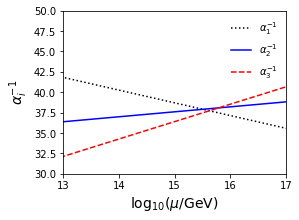

In [74]:
rgefig(ts, ys, xlim=(13,17), ylim=(30,50))

In [75]:
meet(ts, ys)

Dist = 0.53, M_GUT = 4.1e+15 GeV, , vGUT = 4.1e+15 GeV


In [76]:
# Model S2-11
Bunif1L(BSMfermions=[Dirac(1,2,-1)], BSMscalars=[ComplexScalar(3,2,1/3)])

MGUT = 1.8e+14 GeV
Bunif = 0.714 (should be 0.718)


In [77]:
threshs, cRGE = precalcRGE(thresholds=[(0.9e2, ComplexScalar(3,2,1/3)), (0.9e2, Dirac(1,2,-1))])

In [78]:
def func(y, t, twoloop=False):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0

In [79]:
mu_max = 1e20  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

In [80]:
twoloop = False
ys = odeint(func, y0, ts, args=(twoloop,))

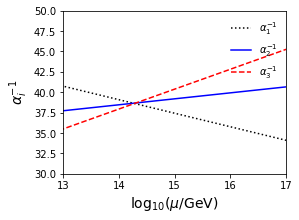

In [81]:
rgefig(ts, ys, xlim=(13,17), ylim=(30,50))

In [82]:
meet(ts, ys)

Dist = 0.10, M_GUT = 1.9e+14 GeV, , vGUT = 1.9e+14 GeV


## Test: Model from Fileviez Perez and Murgui

In [83]:
# From Appendix, our Y is twice theirs
H45 = {
    'Phi1' : ComplexScalar(8,2,1),
    'Phi2' : ComplexScalar(6,1,-Rational(2,3)),
    'Phi3' : ComplexScalar(3,3,-Rational(2,3)),
    'Phi4' : ComplexScalar(3,2,-Rational(7,3)),
    'Phi5' : ComplexScalar(3,1, -Rational(2,3)),
    'Phi6' : ComplexScalar(3,1,Rational(8,3)),
    'H2' : ComplexScalar(1,2,1)
}

In [84]:
mPhi1 = 3.1e3
mPhi3 = 1.0e1**8.6
mH2 = 3.1e3
threshs, cRGE = precalcRGE(thresholds=[
    (mPhi1, H45['Phi1']),
    (mPhi3, H45['Phi3']),
    (mH2, H45['H2'])
])

In [85]:
def func(y, t, twoloop=False):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0

In [86]:
mu_max = 1e20  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

In [87]:
twoloop = False
ys = odeint(func, y0, ts, args=(twoloop,))

In [88]:
meet(ts, ys)

Dist = 0.10, M_GUT = 6.5e+15 GeV, , vGUT = 5.9e+15 GeV


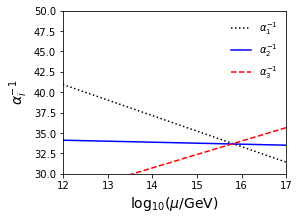

In [89]:
rgefig(ts, ys, xlim=(12,17), ylim=(30,50))

So this is the unification scale from leftmost point of their Fig. 2

In [90]:
np.log10(6.5e15)

15.8129133566

Is this result preserved at 2L?

In [91]:
mPhi1 = 3.1e3
mPhi3 = 8.0e9
mH2 = 3.1e3
threshs, cRGE = precalcRGE(thresholds=[
    (mPhi1, H45['Phi1']),
    (mPhi3, H45['Phi3']),
    (mH2, H45['H2'])
])

In [92]:
def func(y, t, twoloop=False):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0

In [93]:
mu_max = 1e20  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

In [94]:
twoloop = True
ys = odeint(func, y0, ts, args=(twoloop,))

In [95]:
meet(ts, ys)

Dist = 0.10, M_GUT = 7.6e+15 GeV, , vGUT = 6.9e+15 GeV


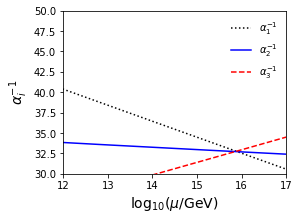

In [96]:
rgefig(ts, ys, xlim=(12,17), ylim=(30,50))

It is, again with 10% increase of GUT scale.

## BPR with H in 45  --- all solutions

Three particle solutions

In [97]:
#--- [(3, 1, -2/3), (3, 2, 1/3), (8, 2, 1)] --- 
#rk = [ 0.64630908  0.94516029  0.94502483]
#mk = [  5.32544688e+06   5.00000000e+02   5.02106037e+02]
#mGUTmax = 2.730e+15 (<- 1.0e+15)


mBPR = 500.
mF = 5.1e+06

#
threshs, cRGE = precalcRGE(thresholds=[
    (mBPR, ComplexScalar(1,1,2)), 
    (mBPR, RealScalar(1,3,0)),
    (mBPR, Weyl(1,2,1, ng)), 
    (mBPR, Weyl(1,2,-1, ng)),
    #
    (mF, Weyl(3,1,-Rational(2,3), ng)), 
    (mF, Weyl(3,1, Rational(2,3), ng)),
    (mBPR, ComplexScalar(3,2,Rational(1,3))),
    #(m81, RealScalar(8,1,0)),
    #(m61, ComplexScalar(6,1,-Rational(2,3))),
    (mBPR, ComplexScalar(8,2,1))
    
])

def func(y, t, twoloop=False):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0

mu_max = 1e20  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

twoloop = False
ys = odeint(func, y0, ts, args=(twoloop,))

meet(ts, ys)

Dist = 0.01, M_GUT = 2.8e+15 GeV, , vGUT = 2.1e+15 GeV


In [98]:
#--- [(3, 1, -2/3), (3, 2, 1/3), (8, 2, 1)] --- 
#rk = [ 0.64630908  0.94516029  0.94502483]
#mk = [  5.32544688e+06   5.00000000e+02   5.02106037e+02]
#mGUTmax = 2.730e+15 (<- 1.0e+15)


mBPR = 500.
mF = 0.54e+06

#
threshs, cRGE = precalcRGE(thresholds=[
    (mBPR, ComplexScalar(1,1,2)), 
    (mBPR, RealScalar(1,3,0)),
    (mBPR, Weyl(1,2,1, ng)), 
    (mBPR, Weyl(1,2,-1, ng)),
    #
    (mF, Weyl(3,1,-Rational(2,3), ng)), 
    (mF, Weyl(3,1, Rational(2,3), ng)),
    (mBPR, ComplexScalar(3,2,Rational(1,3))),
    #(m81, RealScalar(8,1,0)),
    #(m61, ComplexScalar(6,1,-Rational(2,3))),
    (mBPR, ComplexScalar(8,2,1))
    
])

def func(y, t, twoloop=False):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0

mu_max = 1e20  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

twoloop = True
ys = odeint(func, y0, ts, args=(twoloop,))

meet(ts, ys)

Dist = 0.01, M_GUT = 8.3e+15 GeV, , vGUT = 5.9e+15 GeV


In [99]:
#--- [(8, 1, 0), (6, 1, -2/3), (8, 2, 1)] --- 
#rk = [ 0.94375385  0.77259809  0.94491073]
#mk = [    518.19080488  102464.77927779     500.        ]
#mGUTmax = 2.372e+15 (<- 1.0e+15)

mBPR = 500.


m61 = 90.e3

#
threshs, cRGE = precalcRGE(thresholds=[
    (mBPR, ComplexScalar(1,1,2)), 
    (mBPR, RealScalar(1,3,0)),
    (mBPR, Weyl(1,2,1, ng)), 
    (mBPR, Weyl(1,2,-1, ng)),
    (mBPR, RealScalar(8,1,0)),
    (m61, ComplexScalar(6,1,-Rational(2,3))),
    (mBPR, ComplexScalar(8,2,1))
    
])

def func(y, t, twoloop=False):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0

mu_max = 1e20  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

twoloop = False
ys = odeint(func, y0, ts, args=(twoloop,))

meet(ts, ys)

Dist = 0.02, M_GUT = 2.5e+15 GeV, , vGUT = 2e+15 GeV


In [100]:
#--- [(8, 1, 0), (6, 1, -2/3), (8, 2, 1)] --- 
#rk = [ 0.94375385  0.77259809  0.94491073]
#mk = [    518.19080488  102464.77927779     500.        ]
#mGUTmax = 2.372e+15 (<- 1.0e+15)

mBPR = 500.


m61 = 40.e3

#
threshs, cRGE = precalcRGE(thresholds=[
    (mBPR, ComplexScalar(1,1,2)), 
    (mBPR, RealScalar(1,3,0)),
    (mBPR, Weyl(1,2,1, ng)), 
    (mBPR, Weyl(1,2,-1, ng)),
    (mBPR, RealScalar(8,1,0)),
    (m61, ComplexScalar(6,1,-Rational(2,3))),
    (mBPR, ComplexScalar(8,2,1))
    
])

def func(y, t, twoloop=False):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0

mu_max = 1e20  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

twoloop = True
ys = odeint(func, y0, ts, args=(twoloop,))

meet(ts, ys)

Dist = 0.03, M_GUT = 6.7e+15 GeV, , vGUT = 5.2e+15 GeV


**Four** particles

In [101]:
#--- [(3, 1, -2/3), (3, 2, 1/3), (8, 1, 0), (8, 2, 1)] --- 
#rk = [ 0.46261449  0.94652674  0.94632563  0.94652674]
#mk = [  2.43739302e+09   5.00000000e+02   5.03210177e+02   5.00000000e+02]
#mGUTmax = 6.033e+15 (<- 1.0e+15)


mBPR = 500.
mF = 2.28e+09

#
threshs, cRGE = precalcRGE(thresholds=[
    (mBPR, ComplexScalar(1,1,2)), 
    (mBPR, RealScalar(1,3,0)),
    (mBPR, Weyl(1,2,1, ng)), 
    (mBPR, Weyl(1,2,-1, ng)),
    #
    (mF, Weyl(3,1,-Rational(2,3), ng)), 
    (mF, Weyl(3,1, Rational(2,3), ng)),
    (mBPR, ComplexScalar(3,2, Rational(1,3))),
    (mBPR, RealScalar(8,1,0)),
    #(m61, ComplexScalar(6,1,-Rational(2,3))),
    (mBPR, ComplexScalar(8,2,1))
    
])

def func(y, t, twoloop=False):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0

mu_max = 1e20  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

twoloop = False
ys = odeint(func, y0, ts, args=(twoloop,))

meet(ts, ys)

Dist = 0.01, M_GUT = 6.2e+15 GeV, , vGUT = 4.7e+15 GeV


In [102]:
#--- [(3, 1, -2/3), (3, 2, 1/3), (8, 1, 0), (8, 2, 1)] --- 
#rk = [ 0.46261449  0.94652674  0.94632563  0.94652674]
#mk = [  2.43739302e+09   5.00000000e+02   5.03210177e+02   5.00000000e+02]
#mGUTmax = 6.033e+15 (<- 1.0e+15)


mBPR = 500.
mF = 0.56e9

#
threshs, cRGE = precalcRGE(thresholds=[
    (mBPR, ComplexScalar(1,1,2)), 
    (mBPR, RealScalar(1,3,0)),
    (mBPR, Weyl(1,2,1, ng)), 
    (mBPR, Weyl(1,2,-1, ng)),
    #
    (mF, Weyl(3,1,-Rational(2,3), ng)), 
    (mF, Weyl(3,1, Rational(2,3), ng)),
    (mBPR, ComplexScalar(3,2, Rational(1,3))),
    (mBPR, RealScalar(8,1,0)),
    #(m61, ComplexScalar(6,1,-Rational(2,3))),
    (mBPR, ComplexScalar(8,2,1))
    
])

def func(y, t, twoloop=False):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0

mu_max = 1e20  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

twoloop = True
ys = odeint(func, y0, ts, args=(twoloop,))

meet(ts, ys)

Dist = 0.02, M_GUT = 2.2e+16 GeV, , vGUT = 1.5e+16 GeV


In [103]:

#--- [(3, 1, -2/3), (3, 2, 1/3), (1, 2, 1), (8, 2, 1)] --- 
#rk = [ 0.72507244  0.94516029  0.94516029  0.94502483]
#mk = [ 462299.40776013     499.99999998     499.99999998     502.10603536]
#mGUTmax = 2.730e+15 (<- 1.0e+15)


mBPR = 500.
mF = 450.e3

#
threshs, cRGE = precalcRGE(thresholds=[
    (mBPR, ComplexScalar(1,1,2)), 
    (mBPR, RealScalar(1,3,0)),
    (mBPR, Weyl(1,2,1, ng)), 
    (mBPR, Weyl(1,2,-1, ng)),
    #
    (mF, Weyl(3,1,-Rational(2,3), ng)), 
    (mF, Weyl(3,1, Rational(2,3), ng)),
    (mBPR, ComplexScalar(3,2, Rational(1,3))),
    #(mBPR, RealScalar(8,1,0)),
    (mBPR, ComplexScalar(1,2,1)),
    #(m61, ComplexScalar(6,1,-Rational(2,3))),
    (mBPR, ComplexScalar(8,2,1))
])

def func(y, t, twoloop=False):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0

mu_max = 1e20  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

twoloop = False
ys = odeint(func, y0, ts, args=(twoloop,))

meet(ts, ys)

Dist = 0.01, M_GUT = 2.8e+15 GeV, , vGUT = 2.1e+15 GeV


In [104]:

#--- [(3, 1, -2/3), (3, 2, 1/3), (1, 2, 1), (8, 2, 1)] --- 
#rk = [ 0.72507244  0.94516029  0.94516029  0.94502483]
#mk = [ 462299.40776013     499.99999998     499.99999998     502.10603536]
#mGUTmax = 2.730e+15 (<- 1.0e+15)


mBPR = 500.
mF = 44.e3

#
threshs, cRGE = precalcRGE(thresholds=[
    (mBPR, ComplexScalar(1,1,2)), 
    (mBPR, RealScalar(1,3,0)),
    (mBPR, Weyl(1,2,1, ng)), 
    (mBPR, Weyl(1,2,-1, ng)),
    #
    (mF, Weyl(3,1,-Rational(2,3), ng)), 
    (mF, Weyl(3,1, Rational(2,3), ng)),
    (mBPR, ComplexScalar(3,2, Rational(1,3))),
    #(mBPR, RealScalar(8,1,0)),
    (mBPR, ComplexScalar(1,2,1)),
    #(m61, ComplexScalar(6,1,-Rational(2,3))),
    (mBPR, ComplexScalar(8,2,1))
])

def func(y, t, twoloop=False):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0

mu_max = 1e20  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

twoloop = True
ys = odeint(func, y0, ts, args=(twoloop,))

meet(ts, ys)

Dist = 0.04, M_GUT = 9e+15 GeV, , vGUT = 6.2e+15 GeV


In [105]:
#--- [(8, 1, 0), (1, 2, 1), (6, 1, -2/3), (8, 2, 1)] --- 
#rk = [ 0.94516029  0.75073359  0.94516029  0.94502483]
#mk = [    500.          208500.89900973     500.         #    502.10603162]
#mGUTmax = 2.730e+15 (<- 1.0e+15)

mBPR = 500.
mH = 260.e3

#
threshs, cRGE = precalcRGE(thresholds=[
    (mBPR, ComplexScalar(1,1,2)), 
    (mBPR, RealScalar(1,3,0)),
    (mBPR, Weyl(1,2,1, ng)), 
    (mBPR, Weyl(1,2,-1, ng)),
    #
    #(mF, Weyl(3,1,-Rational(2,3), ng)), 
    #(mF, Weyl(3,1, Rational(2,3), ng)),
    #(mBPR, ComplexScalar(3,2, Rational(1,3))),
    (mBPR, RealScalar(8,1,0)),
    (mH, ComplexScalar(1,2,1)),
    (mBPR, ComplexScalar(6,1,-Rational(2,3))),
    (mBPR, ComplexScalar(8,2,1))
])

def func(y, t, twoloop=False):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0

mu_max = 1e20  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

twoloop = False
ys = odeint(func, y0, ts, args=(twoloop,))

meet(ts, ys)

Dist = 0.01, M_GUT = 2.8e+15 GeV, , vGUT = 2.3e+15 GeV


In [106]:
#--- [(8, 1, 0), (1, 2, 1), (6, 1, -2/3), (8, 2, 1)] --- 
#rk = [ 0.94516029  0.75073359  0.94516029  0.94502483]
#mk = [    500.          208500.89900973     500.         #    502.10603162]
#mGUTmax = 2.730e+15 (<- 1.0e+15)

mBPR = 500.
mH = 260.e3

#
threshs, cRGE = precalcRGE(thresholds=[
    (mBPR, ComplexScalar(1,1,2)), 
    (mBPR, RealScalar(1,3,0)),
    (mBPR, Weyl(1,2,1, ng)), 
    (mBPR, Weyl(1,2,-1, ng)),
    #
    #(mF, Weyl(3,1,-Rational(2,3), ng)), 
    #(mF, Weyl(3,1, Rational(2,3), ng)),
    #(mBPR, ComplexScalar(3,2, Rational(1,3))),
    (mBPR, RealScalar(8,1,0)),
    (mH, ComplexScalar(1,2,1)),
    (mBPR, ComplexScalar(6,1,-Rational(2,3))),
    (mBPR, ComplexScalar(8,2,1))
])

def func(y, t, twoloop=False):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0

mu_max = 1e20  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

twoloop = True
ys = odeint(func, y0, ts, args=(twoloop,))

meet(ts, ys)

Dist = 0.01, M_GUT = 8.3e+15 GeV, , vGUT = 6.3e+15 GeV


Now a special 3-particle scenario, with unification only for mass of these particels 180 Gev (1L) or 275 GeV (2L

In [107]:
#--- [(8, 1, 0), (1, 2, 1), (6, 1, -2/3), (8, 2, 1)] --- 
#rk = [ 0.94516029  0.75073359  0.94516029  0.94502483]
#mk = [    500.          208500.89900973     500.             502.10603162]
#mGUTmax = 2.730e+15 (<- 1.0e+15)
#--- [(8, 1, 0), (1, 2, 1), (6, 1, -2/3), (8, 2, 1)] --- 
#rk = [ 0.94545212  0.94545212  0.94545212  0.94545212]
#mk = [ 497.3549669  497.3549669  497.3549669  497.3549669]
#mGUTmax = 2.924e+15 (<- 1.0e+15)

mBPR = 500.
mS = 180.

#
threshs, cRGE = precalcRGE(thresholds=[
    (mBPR, ComplexScalar(1,1,2)), 
    (mBPR, RealScalar(1,3,0)),
    (mBPR, Weyl(1,2,1, ng)), 
    (mBPR, Weyl(1,2,-1, ng)),
    #
    #(mF, Weyl(3,1,-Rational(2,3), ng)), 
    #(mF, Weyl(3,1, Rational(2,3), ng)),
    #(mBPR, ComplexScalar(3,2, Rational(1,3))),
    (mS, RealScalar(8,1,0)),
    (mS, ComplexScalar(1,2,1)),
    (mS, ComplexScalar(6,1,-Rational(2,3))),
    (mS, ComplexScalar(8,2,1))
])

def func(y, t, twoloop=False):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0

mu_max = 1e20  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

twoloop = False
ys = odeint(func, y0, ts, args=(twoloop,))

meet(ts, ys)

Dist = 0.02, M_GUT = 3.3e+15 GeV, , vGUT = 2.7e+15 GeV


In [108]:

#--- [(8, 1, 0), (1, 2, 1), (6, 1, -2/3), (8, 2, 1)] --- 
#rk = [ 0.94545212  0.94545212  0.94545212  0.94545212]
#mk = [ 497.3549669  497.3549669  497.3549669  497.3549669]
#mGUTmax = 2.924e+15 (<- 1.0e+15)

mBPR = 500.
mS = 275.

#
threshs, cRGE = precalcRGE(thresholds=[
    (mBPR, ComplexScalar(1,1,2)), 
    (mBPR, RealScalar(1,3,0)),
    (mBPR, Weyl(1,2,1, ng)), 
    (mBPR, Weyl(1,2,-1, ng)),
    #
    #(mF, Weyl(3,1,-Rational(2,3), ng)), 
    #(mF, Weyl(3,1, Rational(2,3), ng)),
    #(mBPR, ComplexScalar(3,2, Rational(1,3))),
    (mS, RealScalar(8,1,0)),
    (mS, ComplexScalar(1,2,1)),
    (mS, ComplexScalar(6,1,-Rational(2,3))),
    (mS, ComplexScalar(8,2,1))
])

def func(y, t, twoloop=False):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0

mu_max = 1e20  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

twoloop = True
ys = odeint(func, y0, ts, args=(twoloop,))

meet(ts, ys)

Dist = 0.01, M_GUT = 9.8e+15 GeV, , vGUT = 7.4e+15 GeV


**Five** particle solution

In [109]:
#--- [(3, 1, -2/3), (3, 2, 1/3), (8, 1, 0), (1, 2, 1), (8, 2, 1)] --- 
#rk = [ 0.54145428  0.94652702  0.94651862  0.94652702  0.94652702]
#mk = [  1.98310476e+08   5.00000000e+02   5.00133696e+02   5.00000000e+02 5.00000000e+02]
#mGUTmax = 6.034e+15 (<- 1.0e+15)


mBPR = 500.
mF = 1.85e+8

#
threshs, cRGE = precalcRGE(thresholds=[
    (mBPR, ComplexScalar(1,1,2)), 
    (mBPR, RealScalar(1,3,0)),
    (mBPR, Weyl(1,2,1, ng)), 
    (mBPR, Weyl(1,2,-1, ng)),
    #
    (mF, Weyl(3,1,-Rational(2,3), ng)), 
    (mF, Weyl(3,1, Rational(2,3), ng)),
    (mBPR, ComplexScalar(3,2, Rational(1,3))),
    (mBPR, RealScalar(8,1,0)),
    (mBPR, ComplexScalar(1,2,1)),
    #(mS, ComplexScalar(6,1,-Rational(2,3))),
    (mBPR, ComplexScalar(8,2,1))
])

def func(y, t, twoloop=False):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0

mu_max = 1e20  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

twoloop = False
ys = odeint(func, y0, ts, args=(twoloop,))

meet(ts, ys)

Dist = 0.01, M_GUT = 6.2e+15 GeV, , vGUT = 4.6e+15 GeV


In [110]:
#--- [(3, 1, -2/3), (3, 2, 1/3), (8, 1, 0), (1, 2, 1), (8, 2, 1)] --- 
#rk = [ 0.54145428  0.94652702  0.94651862  0.94652702  0.94652702]
#mk = [  1.98310476e+08   5.00000000e+02   5.00133696e+02   5.00000000e+02 5.00000000e+02]
#mGUTmax = 6.034e+15 (<- 1.0e+15)

mBPR = 500.
mF = 0.43e8

#
threshs, cRGE = precalcRGE(thresholds=[
    (mBPR, ComplexScalar(1,1,2)), 
    (mBPR, RealScalar(1,3,0)),
    (mBPR, Weyl(1,2,1, ng)), 
    (mBPR, Weyl(1,2,-1, ng)),
    #
    (mF, Weyl(3,1,-Rational(2,3), ng)), 
    (mF, Weyl(3,1, Rational(2,3), ng)),
    (mBPR, ComplexScalar(3,2, Rational(1,3))),
    (mBPR, RealScalar(8,1,0)),
    (mBPR, ComplexScalar(1,2,1)),
    #(mS, ComplexScalar(6,1,-Rational(2,3))),
    (mBPR, ComplexScalar(8,2,1))
])

def func(y, t, twoloop=False):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0

mu_max = 1e20  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

twoloop = True
ys = odeint(func, y0, ts, args=(twoloop,))

meet(ts, ys)

Dist = 0.04, M_GUT = 2.3e+16 GeV, , vGUT = 1.6e+16 GeV


In [111]:

#--- [(3, 1, -4/3), (3, 2, 1/3), (8, 1, 0), (6, 1, -2/3), (8, 2, 1)] --- 
#rk = [ 0.86956013  0.94663829  0.94663829  0.94654592  0.94663829]
#mk = [ 5840.67522989   500.           500.           501.4750291    500.        ]
#mGUTmax = 6.448e+15 (<- 1.0e+15)


mBPR = 500.
mS = 2400.

#
threshs, cRGE = precalcRGE(thresholds=[
    (mBPR, ComplexScalar(1,1,2)), 
    (mBPR, RealScalar(1,3,0)),
    (mBPR, Weyl(1,2,1, ng)), 
    (mBPR, Weyl(1,2,-1, ng)),
    #
    #(mF, Weyl(3,1,-Rational(2,3), ng)), 
    #(mF, Weyl(3,1, Rational(2,3), ng)),
    (mS, ComplexScalar(3,1,-Rational(4,3))),
    (mBPR, ComplexScalar(3,2, Rational(1,3))),
    (mBPR, RealScalar(8,1,0)),
    #(mBPR, ComplexScalar(1,2,1)),
    (mBPR, ComplexScalar(6,1,-Rational(2,3))),
    (mBPR, ComplexScalar(8,2,1))
])

def func(y, t, twoloop=False):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0

mu_max = 1e20  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

twoloop = False
ys = odeint(func, y0, ts, args=(twoloop,))

meet(ts, ys)

Dist = 0.03, M_GUT = 6.5e+15 GeV, , vGUT = 5e+15 GeV


In [112]:

#--- [(3, 1, -4/3), (3, 2, 1/3), (8, 1, 0), (6, 1, -2/3), (8, 2, 1)] --- 
#rk = [ 0.86956013  0.94663829  0.94663829  0.94654592  0.94663829]
#mk = [ 5840.67522989   500.           500.           501.4750291    500.        ]
#mGUTmax = 6.448e+15 (<- 1.0e+15)


mBPR = 500.
mS = 2000.

#
threshs, cRGE = precalcRGE(thresholds=[
    (mBPR, ComplexScalar(1,1,2)), 
    (mBPR, RealScalar(1,3,0)),
    (mBPR, Weyl(1,2,1, ng)), 
    (mBPR, Weyl(1,2,-1, ng)),
    #
    #(mF, Weyl(3,1,-Rational(2,3), ng)), 
    #(mF, Weyl(3,1, Rational(2,3), ng)),
    (mS, ComplexScalar(3,1,-Rational(4,3))),
    (mBPR, ComplexScalar(3,2, Rational(1,3))),
    (mBPR, RealScalar(8,1,0)),
    #(mBPR, ComplexScalar(1,2,1)),
    (mBPR, ComplexScalar(6,1,-Rational(2,3))),
    (mBPR, ComplexScalar(8,2,1))
])

def func(y, t, twoloop=False):
    """Derivative of inverse alpha.
    d inv_alpha/dt = c0 + c1/inv_alpha
    """
    c0, c1 = cRGE[np.searchsorted(threshs, t)-1]
    if twoloop:
        return c0 + c1.dot(1/y)
    else:
        return c0

mu_max = 1e20  # we integrate up to this scale in GeV
npts = 1000     # number of integration points
ts = np.linspace(0, t(mu_max), npts)

twoloop = True
ys = odeint(func, y0, ts, args=(twoloop,))

meet(ts, ys)

Dist = 0.01, M_GUT = 2.5e+16 GeV, , vGUT = 1.8e+16 GeV


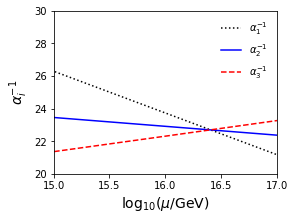

In [113]:
rgefig(ts, ys, xlim=(15,17), ylim=(20,30))